# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

## Imports and loading the data csv

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd

In [2]:
titanic_df = pd.read_csv('data/ML_Titanic_dataset.csv')
type(titanic_df)

pandas.core.frame.DataFrame

## Initial exploration of the dataset 

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [3]:
print(f"""
{titanic_df.info()}
{titanic_df.isnull().sum()}
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

We will get rid of the `Cabin` in `titanic_df`

In [4]:
titanic_df.drop(labels="Cabin", axis=1, index=None, columns=None, level=None, inplace=True, errors='raise')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [6]:
pclass_df = titanic_df.groupby(by="Pclass")["PassengerId"].count()

print(f"""
{type(pclass_df) = }
{len(pclass_df) = }
{pclass_df.index = }
""")

pclass_df = pclass_df.to_frame(name="count")

print(f"""
{type(pclass_df) = }
{len(pclass_df) = }
{pclass_df.index = }
{pclass_df.columns = }
""")

pclass_df


type(pclass_df) = <class 'pandas.core.series.Series'>
len(pclass_df) = 3
pclass_df.index = Int64Index([1, 2, 3], dtype='int64', name='Pclass')


type(pclass_df) = <class 'pandas.core.frame.DataFrame'>
len(pclass_df) = 3
pclass_df.index = Int64Index([1, 2, 3], dtype='int64', name='Pclass')
pclass_df.columns = Index(['count'], dtype='object')



,count
Pclass,
1,216
2,184
3,491


Let's try to make sense of the data with a plot.

<AxesSubplot:xlabel='Pclass'>

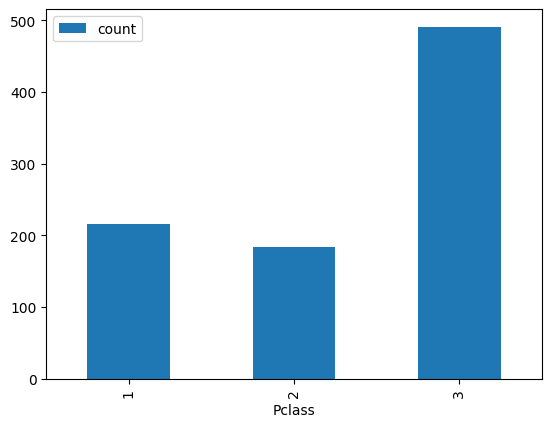

In [7]:
pclass_df.plot(kind="bar")

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

In [8]:
pclass_surv_df = titanic_df.groupby(by=["Pclass"])["Survived"].mean().to_frame(name="frequency_survival")

print(f"""
{type(pclass_surv_df) = }
{len(pclass_surv_df) = }
{pclass_surv_df.index = }
""")

pclass_surv_df


type(pclass_surv_df) = <class 'pandas.core.frame.DataFrame'>
len(pclass_surv_df) = 3
pclass_surv_df.index = Int64Index([1, 2, 3], dtype='int64', name='Pclass')



,frequency_survival
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

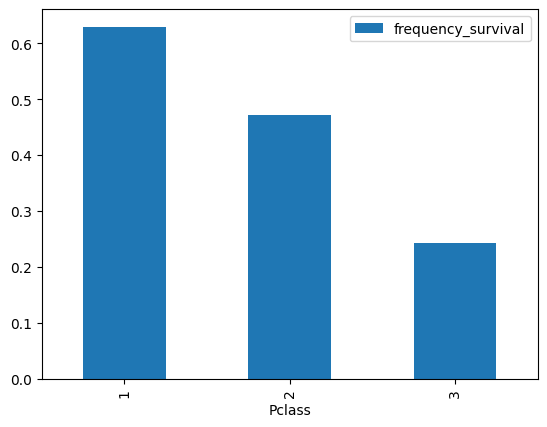

In [9]:
pclass_surv_df.plot(kind="bar")

❓ Plot a barchart of *amount of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

In [10]:
amount_survivals = titanic_df.groupby(by=["Pclass","Survived"])["PassengerId"].count().to_frame(name="count")

amount_survivals

count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

<AxesSubplot:xlabel='Pclass,Survived'>

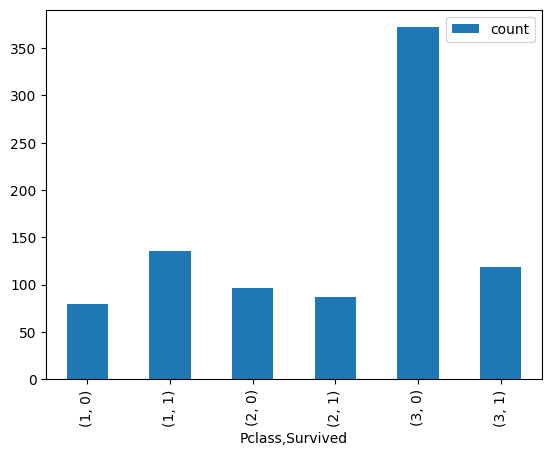

In [11]:
amount_survivals.plot(kind="bar")

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [12]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

In [13]:
survival_gender = titanic_df.groupby(["Sex"])["Survived"].mean().to_frame(name="survival_gender")
survival_gender

,survival_gender
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex'>

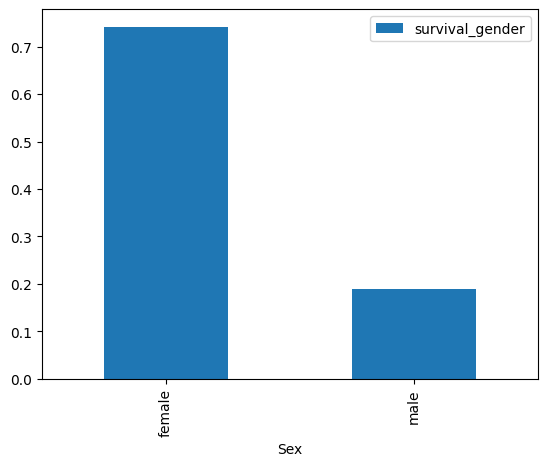

In [14]:
survival_gender.plot(kind="bar")

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

<AxesSubplot:xlabel='Sex'>

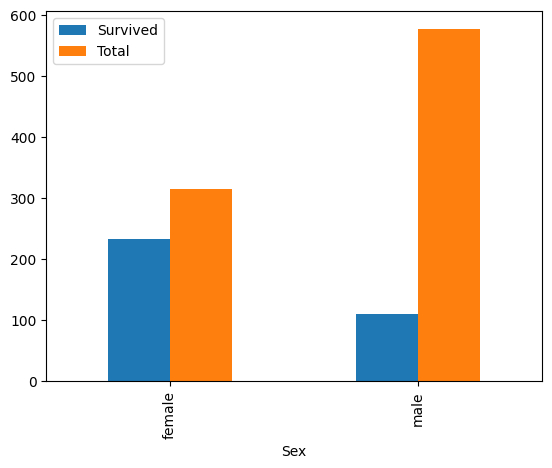

In [15]:
survivors_df = titanic_df[['Survived', 'Sex']].groupby('Sex').sum()
survivors_df['Total'] = titanic_df[['Survived', 'Sex']].groupby('Sex').count()
survivors_df.plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

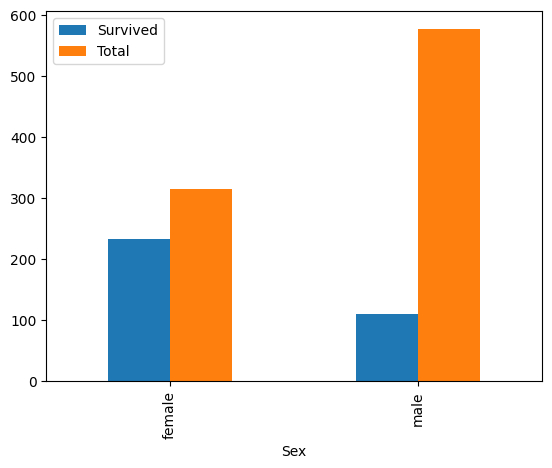

In [16]:
survivors_df.plot(kind="bar")

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [17]:
children_df = titanic_df[titanic_df["Age"] <= 17]

children_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S


❓ How many children were there in the Titanic?

In [18]:
print(f"""
{type(children_df) = }
{len(children_df) = }
""")


type(children_df) = <class 'pandas.core.frame.DataFrame'>
len(children_df) = 113



❓ How many children survived?

In [19]:
children_df.groupby("Survived").count()["PassengerId"]

Survived
0    52
1    61
Name: PassengerId, dtype: int64

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [20]:
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577


In [33]:
survivors_df.loc['children'] = [children_df['Survived'].sum(), children_df.shape[0]]
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113


In [32]:
children_gender_df = children_df[['Survived', 'Sex']].groupby('Sex').sum()
children_gender_df["Total"] = children_df[['Survived', 'Sex']].groupby('Sex').count() 
children_gender_df.loc['children'] = [ 0, 0 ]

children_gender_df

,Survived,Total
Sex,,
female,38,55
male,23,58
children,0,0


<AxesSubplot:xlabel='Sex'>

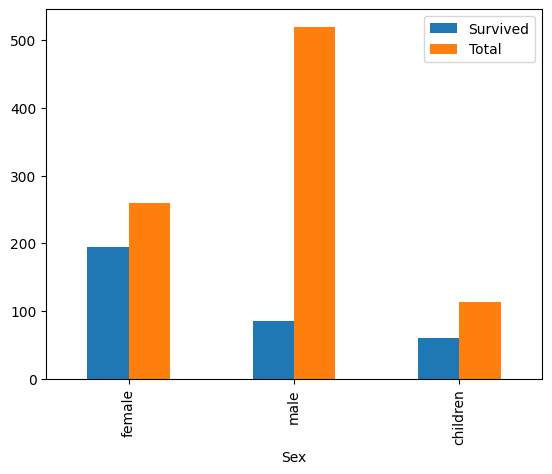

In [34]:
(survivors_df - children_gender_df).plot(kind='bar')

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [39]:
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


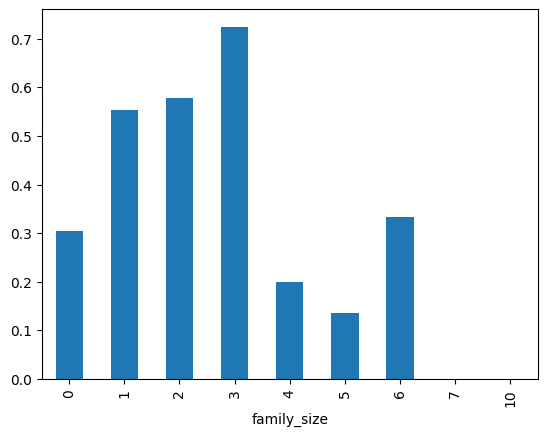

In [40]:
titanic_df.groupby('family_size').mean()['Survived'].plot(kind='bar');

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [ ]:
[1].split('.')[0].strip()

In [50]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,Mr


<AxesSubplot:xlabel='Title'>

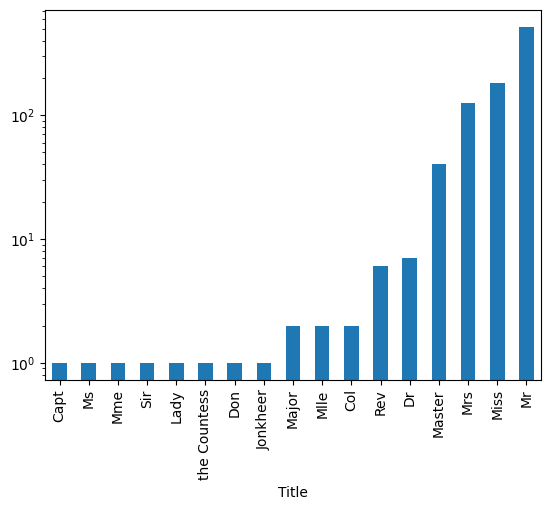

In [52]:
titanic_df.groupby('Title').count()['PassengerId'].sort_values().plot(kind='bar', logy=True)

<AxesSubplot:xlabel='Title'>

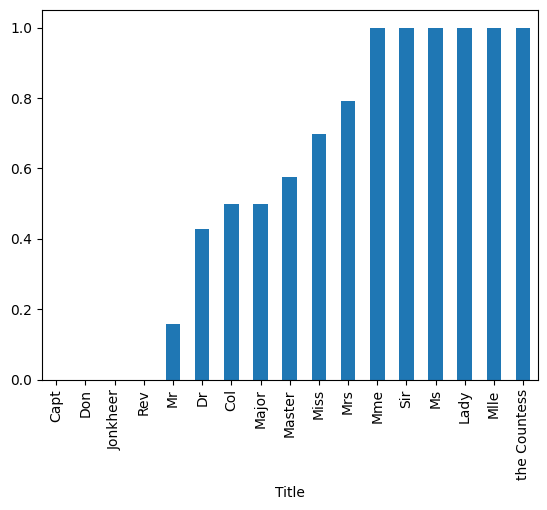

In [53]:
titanic_df.groupby('Title').mean()['Survived'].sort_values().plot(kind='bar')